In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt


In [2]:
# Define constants
Cu = 4.5
a = 1
g = 9.8 # m/s^2



In [84]:
zfile = '11_zref_usw.txt'
outfile = 'roughness_test.txt'
# Load array of Zref
zref = np.genfromtxt('11_zref_usw.txt',delimiter = ' ',skip_header = 6)
# Remove all negative values and NoData
zref[zref < 0] = 0

In [4]:
# Load array of depth
#depth = np.genfromtxt('depth.txt',delimiter = ' ',skip_header = 6)
depth = np.zeros(zref.shape)
depth[depth == 0] = 1

In [5]:
# Calculate array of Epsilon values
def Epsilon(zref,depth):
    newzref = ma.masked_where(zref == 0,zref)
    epsilon = depth/zref
    epsilon = ma.masked_where(epsilon <= 0.2,epsilon)
    epsilon = ma.masked_where(epsilon >= 7,epsilon)
    return epsilon
# Calculate array of function of alpha and epsilon
def Func(alpha,epsilon):
    function = ma.masked_where(epsilon == 0, epsilon)
    function = 1+(alpha*(1/function)*np.log((np.cosh((1/alpha)-((1/alpha)*function)))/(np.cosh(1/alpha))))
    return function
# Calculate array of roughness values
def NCalc(Cu,g,depth,function):
    n = (depth**(1/6)/((g**(1/2))*Cu*function))
    return n

In [6]:
# Produced masked array of roughness
eps = Epsilon(zref,depth)
func = Func(a,eps)
n = NCalc(Cu,g,depth,func)
# Fille masked values with default of 0.04
n = ma.filled(n,fill_value=0.04)

/home/paul/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.


In [93]:
def ReadWriteRaster(inraster,outraster,array):
    from numpy import savetxt
    with open(inraster,"r") as file:
        header = {}
        for i in range(6):
            header[i]=file.readline()
    file.close()
    with open(outfile,'w') as file:
        for i in range(6):
            file.write(header[i])
    file.close()
    savetxt('vals.txt',n)
    datafile = open('vals.txt','r')
    data = datafile.read()
    datafile.close()
    with open(outfile,'a') as file:
        file.write(data)
    file.close()
        


In [94]:
ReadWriteRaster(zfile,outfile,n)


In [89]:
np.savetxt('vals.txt',n)

In [21]:
#Make histogram of manning values
hist, bin_edges = np.histogram(n,bins=20)

In [22]:
hist

array([301062,   7336,   4128,   2718,   2054,   1683,   1243,   1170,
          948,    855,    780,    760,    808,    895,   1021,   1104,
         1347,   1684,   2207,   2872], dtype=int64)

In [23]:
bin_edges

array([ 0.04      ,  0.05045888,  0.06091775,  0.07137663,  0.08183551,
        0.09229438,  0.10275326,  0.11321214,  0.12367101,  0.13412989,
        0.14458876,  0.15504764,  0.16550652,  0.17596539,  0.18642427,
        0.19688315,  0.20734202,  0.2178009 ,  0.22825978,  0.23871865,
        0.24917753])

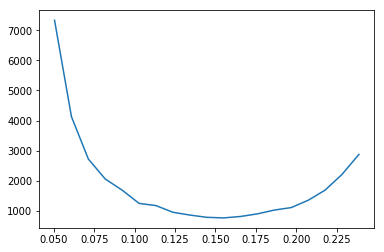

In [26]:
plt.plot(bin_edges[1:-1],hist[1:])
plt.show()